In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Test function

In [2]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [3]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

[('x0',), ('x1',), ('x0', 'x0'), ('x0', 'x1'), ('x1', 'x1')]
[[1.     0.     0.     0.     0.     0.    ]
 [1.     0.25   0.     0.0625 0.     0.    ]
 [1.     0.5    0.     0.25   0.     0.    ]
 [1.     0.75   0.     0.5625 0.     0.    ]
 [1.     1.     0.     1.     0.     0.    ]
 [1.     0.     0.25   0.     0.     0.0625]
 [1.     0.25   0.25   0.0625 0.0625 0.0625]
 [1.     0.5    0.25   0.25   0.125  0.0625]
 [1.     0.75   0.25   0.5625 0.1875 0.0625]
 [1.     1.     0.25   1.     0.25   0.0625]
 [1.     0.     0.5    0.     0.     0.25  ]
 [1.     0.25   0.5    0.0625 0.125  0.25  ]
 [1.     0.5    0.5    0.25   0.25   0.25  ]
 [1.     0.75   0.5    0.5625 0.375  0.25  ]
 [1.     1.     0.5    1.     0.5    0.25  ]
 [1.     0.     0.75   0.     0.     0.5625]
 [1.     0.25   0.75   0.0625 0.1875 0.5625]
 [1.     0.5    0.75   0.25   0.375  0.5625]
 [1.     0.75   0.75   0.5625 0.5625 0.5625]
 [1.     1.     0.75   1.     0.75   0.5625]
 [1.     0.     1.     0.     0.     1.

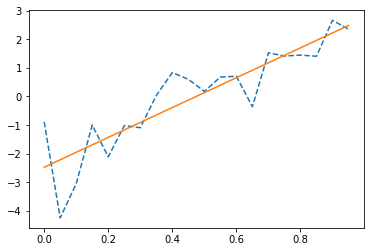

In [4]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 1)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

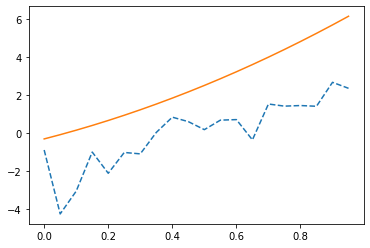

In [5]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func, p=2)
znoisy = z + noise
znoisy_centered = znoisy-np.mean(znoisy)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


(10, 10)
(10, 10)


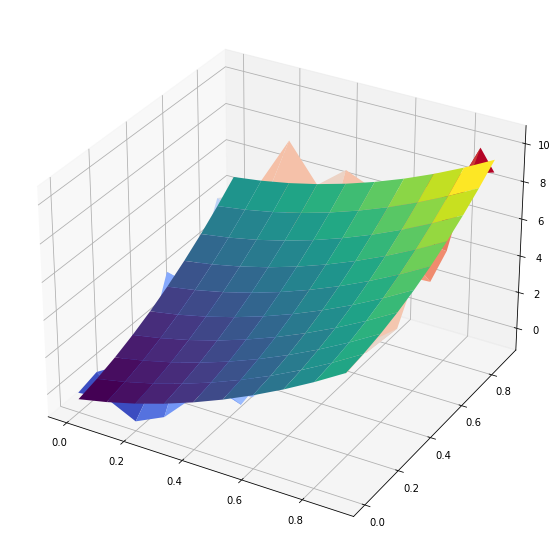

In [6]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y
xvec = np.array([x, y])
z = test_func(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func_2, p=2)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy-np.mean(znoisy)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

# b)

(100, 100)
(100, 100)


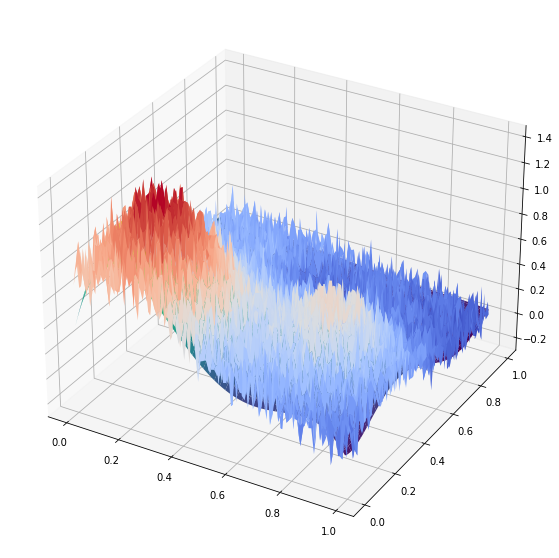

In [7]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X, znoisy_centered, znoisy = ols_fp(xvec = xvec, f = FrankeFunction, p=5, sigma = 0.1)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy_centered.reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
#ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

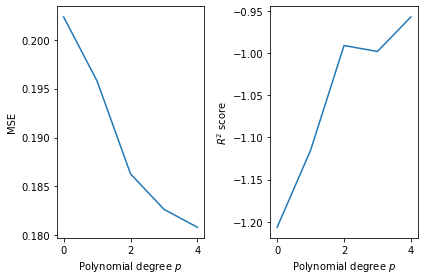

In [8]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])

mses = np.zeros((5))
Rs = np.zeros((5))
betas = []
for p in range(1,6):
    znoisy_tilde, X, znoisy_centered, znoisy, betahat = ols_fp(xvec = xvec, f = FrankeFunction, p=p, sigma=0.1, return_betas=True)
    mses[p-1] = MSE(y = znoisy,ytilde = znoisy_tilde+ np.mean(z))
    Rs[p-1] = Rscore(y = znoisy, ytilde = znoisy_tilde+ np.mean(z))
    betas.append(betahat)

fig, axs = plt.subplots(1,2)
axs[0].plot(mses)
axs[0].set_ylabel("MSE")
axs[1].plot(Rs)
axs[1].set_ylabel("$R^2$ score")
[ax.set_xlabel("Polynomial degree $p$") for ax in axs]
fig.tight_layout()

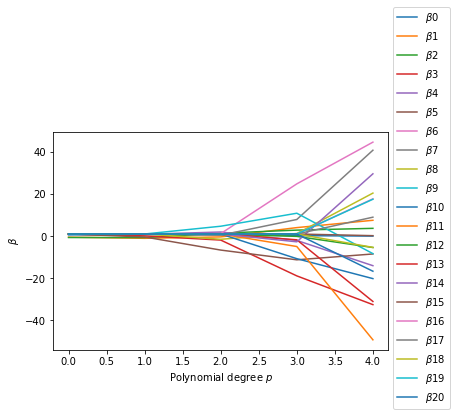

In [9]:
%matplotlib inline
beta_matrix = np.ones((5, len(betas[-1])))
for i in range(5):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(bbox_to_anchor=(1,.5,.1,1.1))

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

[None, None]

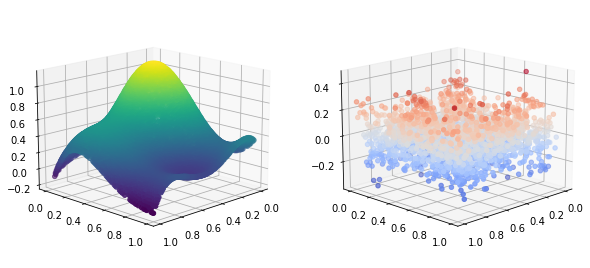

In [10]:
%matplotlib inline
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X = make_design_matrix(xvec = xvec, p = 4)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(1,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
#axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
#axs[0].scatter(xtrain, ytrain, ztrain-ztilde_train, c=ztrain-ztilde_train, cmap=cm.coolwarm)

#axs[1].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
#axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)
axs[1].scatter(xtest, ytest, ztest + np.mean(z)-ztilde_test, c=np.mean(z)+ztest-ztilde_test, cmap=cm.coolwarm)
[ax.view_init(15,45) for ax in axs]

In [11]:
np.mean(znoisy)

0.41199812490016974

# Bias-variance trade-off test function

In [12]:
model_complexity = 10
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 21})
    mses_train[p-1] = MSE(y = ztrain+np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain+np.mean(z), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest+np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest+np.mean(z), ytilde = ztilde_test)

Text(0.5, 0, 'Polynomial degree')

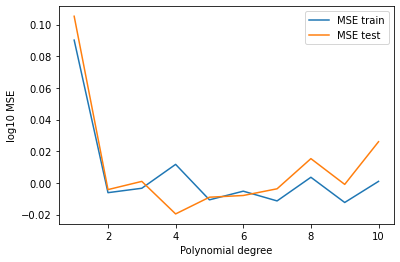

In [13]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")

In [14]:
#fig, axs = plt.subplots(1,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
#axs[0].scatter(xtrain, ytrain, ztrain-ztilde_train, c=ztrain-ztilde_train, cmap=cm.coolwarm)
#axs[1].scatter(xtest, ytest, ztest-ztilde_test, c=ztest-ztilde_test, cmap=cm.coolwarm)
#[ax.view_init(0,45) for ax in axs]

# Bias-variance trade-off Franke function

In [53]:
model_complexity = 30
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain + np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain + np.mean(z), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest + np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest + np.mean(z), ytilde = ztilde_test)
    

Text(0.5, 0, 'Polynomial degree')

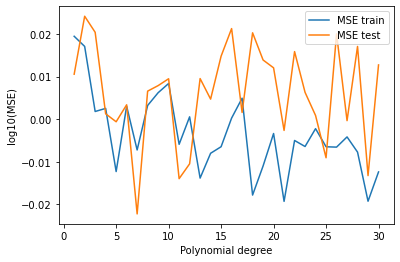

In [54]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# Bootstrap

In [17]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
data = np.random.normal(size=(100,100))
out_bootstrap = bootstrap(data=data, k = 1000)

In [18]:
out_bootstrap

{'mean': array([-2.64400856e-02, -2.24823684e-02, -2.15288381e-02, -3.09052798e-02,
        -3.78643451e-03, -2.59156619e-02, -3.25406529e-02, -9.01293129e-03,
        -3.28073676e-02, -3.27246798e-02, -2.17010114e-02, -1.77990873e-02,
        -1.66342870e-02,  5.49674393e-04, -1.30491283e-02, -1.65445605e-02,
        -2.36309355e-02, -2.38341665e-02, -1.83680829e-02, -9.90370755e-05,
        -2.42044763e-02, -1.88800165e-02, -1.88379308e-02, -2.51098644e-02,
        -1.76599598e-02, -3.64404077e-03, -1.22370505e-02, -1.60689712e-02,
        -2.19007564e-02, -1.61468144e-02, -1.29931455e-02, -3.70398468e-02,
        -1.79886902e-02,  2.83476878e-03, -2.81066631e-02, -1.14999777e-02,
        -3.26199705e-02,  9.54568343e-04,  2.47957246e-03, -2.54238927e-02,
        -2.59693221e-02, -1.43583536e-02, -2.92074144e-02, -2.54954537e-02,
        -2.52136548e-02, -1.11331122e-02, -2.37410102e-02, -2.81759612e-02,
        -2.16665940e-02,  2.39936475e-03, -9.12704673e-03, -1.47147329e-03,
    

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
         2.,  3.,  2.,  0.,  6.,  2.,  4.,  3.,  8., 10.,  6.,  7.,  6.,
         7.,  6., 11.,  7., 14., 17.,  7., 20., 14., 12., 25., 10., 16.,
        20., 21., 16., 11., 28., 30., 26., 32., 24., 27., 24., 23., 26.,
        31., 31., 26., 28., 28., 29., 11., 18., 16., 24., 19., 22., 16.,
        20., 13., 11., 17., 14.,  7., 11.,  8., 14.,  5.,  5.,  3.,  5.,
         1.,  5.,  5.,  3.,  3.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.05154844, -0.0508992 , -0.05024997, -0.04960074, -0.04895151,
        -0.04830227, -0.04765304, -0.04700381, -0.04635458, -0.04570534,
        -0.04505611, -0.04440688, -0.04375764, -0.04310841, -0.04245918,
        -0.04180995, -0.04116071, -0.04051148, -0.03986225, -0.03921302,
        -0.03856378, -0.03791455, -0.03726532, -0.03661608, -0.03596685,
        -0.03531762, -0.03466839, -0.03401915, -0.03336992, -0.032720

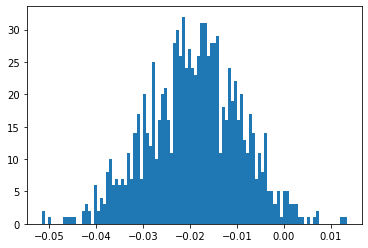

In [19]:
plt.hist(out_bootstrap['mean'], bins=100)

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,
         3.,  0.,  2.,  1.,  4.,  2.,  4.,  1.,  1.,  3.,  2.,  6.,  3.,
         6., 13.,  6.,  8., 10., 12., 13., 16., 25., 11., 13., 12., 13.,
        14., 24., 21., 12., 21., 18., 11., 25., 26., 19., 26., 20., 21.,
        27., 22., 26., 25., 24., 28., 24., 27., 17., 20., 18., 23., 31.,
        22., 22., 12., 11., 13., 11., 14., 12., 13., 11., 10.,  8., 11.,
         8.,  6.,  9.,  4.,  7.,  1.,  4.,  4.,  3.,  2.,  2.,  0.,  3.,
         3.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([0.94338318, 0.94423481, 0.94508644, 0.94593806, 0.94678969,
        0.94764131, 0.94849294, 0.94934456, 0.95019619, 0.95104781,
        0.95189944, 0.95275107, 0.95360269, 0.95445432, 0.95530594,
        0.95615757, 0.95700919, 0.95786082, 0.95871245, 0.95956407,
        0.9604157 , 0.96126732, 0.96211895, 0.96297057, 0.9638222 ,
        0.96467383, 0.96552545, 0.96637708, 0.9672287 , 0.96808033,
        0.96893195, 0.9697

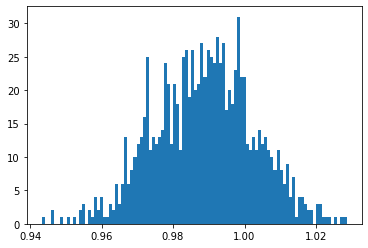

In [20]:
plt.hist(out_bootstrap['var'], bins=100)

# d)

In [155]:
indices = np.arange(len(b))
np.random.shuffle(indices)
indices

array([4, 2, 0, 3, 5, 1])

In [244]:
b = np.arange(23)+1
indices = np.arange(len(b))
np.random.shuffle(indices)
k = 6
#n = int(np.ceil(len(b)/k ))
n = int(np.floor(len(b)/k ))
print(n)
split = []
for i in range(k):
    if i == k-1:
        sel = b[indices[i*n:]]
        print(len(sel)-n)
        print(sel[len(sel)-n-1:])
        if len(sel) - n > 1:
            j = 0
            for x in sel[len(sel)-n-1:]:
                split[j] = np.array(list(split[j]) + [x])
                indx = j + len(sel)-n-1
                sel = np.delete(sel,indx)
                j+=1
    else:
        sel = b[indices[i*n:i*n+n]]
    split.append(sel)
total = []
for x in split:
    print(x)
    total = total + list(x)
np.sort(np.array(total))

3
5
[ 1 15 20 23]
[10 16 19  1]
[ 5 13 21 15]
[18  6  8 20]
[ 9  3 22 23]
[ 7 17 14]
[ 2 11  4 12]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [135]:
def cross_validation(z, k):
    b = z.ravel()
    indices = np.arange(len(b))
    np.random.shuffle(indices)
    n = int(np.ceil(len(b)/k ))
    split = []
    for i in range(k):
        #print("index of indices", np.arange(i*n,i*n+n))
        #sprint("indices", indices[i*n:i*n+n])
        split.append(b[indices[i*n:i*n+n]])
    
    return 0

SyntaxError: invalid syntax (3494506989.py, line 2)

# e)

In [47]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

model_complexity = 10
lambdas = np.logspace(-5,7, 100)

mses_train, Rs_train = np.zeros((model_complexity, len(lambdas))), np.zeros((model_complexity,len(lambdas)))
mses_test, Rs_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas)))
for p in range(1, model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise

    for i in range(len(lambdas)):
        lmbda = lambdas[i]
        ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ridge_fp_train_test_split(X = X, 
                                                                                                    y = znoisy, 
                                                                                                    lmbda = lmbda, 
                                                                                                  **{"test_size" : 0.3, 
                                                                                                    "random_state" : 42})
        #print(lmbda, Xtrain.shape, Xtest.shape)
        mses_train[p-1, i] = MSE(y = ztrain,ytilde = ztilde_train)
        Rs_train[p-1, i] = Rscore(y = ztrain, ytilde = ztilde_train)

        mses_test[p-1, i] = MSE(y = ztest,ytilde = ztilde_test)
        Rs_test[p-1, i] = Rscore(y = ztest, ytilde = ztilde_test)

[[1.e-05 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32194115e-05]]
[[1.7475284e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.7475284e-05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.7475284e-05]]
[[2.3101297e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.3101297e-05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.3101297e-05]]
[[3.05385551e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.05385551e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.05385551e-05]]
[[4.03701726e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.03701726e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.03701726e-05]]
[[5.33669923e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.33669923e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.33669923e-05]]
[[7.05480231e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.05480231

[[0.00021544 0.         0.         0.         0.         0.        ]
 [0.         0.00021544 0.         0.         0.         0.        ]
 [0.         0.         0.00021544 0.         0.         0.        ]
 [0.         0.         0.         0.00021544 0.         0.        ]
 [0.         0.         0.         0.         0.00021544 0.        ]
 [0.         0.         0.         0.         0.         0.00021544]]
[[0.0002848 0.        0.        0.        0.        0.       ]
 [0.        0.0002848 0.        0.        0.        0.       ]
 [0.        0.        0.0002848 0.        0.        0.       ]
 [0.        0.        0.        0.0002848 0.        0.       ]
 [0.        0.        0.        0.        0.0002848 0.       ]
 [0.        0.        0.        0.        0.        0.0002848]]
[[0.00037649 0.         0.         0.         0.         0.        ]
 [0.         0.00037649 0.         0.         0.         0.        ]
 [0.         0.         0.00037649 0.         0.         0.        ]

[[1000.    0.    0.    0.    0.    0.]
 [   0. 1000.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.    0.]
 [   0.    0.    0. 1000.    0.    0.]
 [   0.    0.    0.    0. 1000.    0.]
 [   0.    0.    0.    0.    0. 1000.]]
[[1321.94114847    0.            0.            0.            0.
     0.        ]
 [   0.         1321.94114847    0.            0.            0.
     0.        ]
 [   0.            0.         1321.94114847    0.            0.
     0.        ]
 [   0.            0.            0.         1321.94114847    0.
     0.        ]
 [   0.            0.            0.            0.         1321.94114847
     0.        ]
 [   0.            0.            0.            0.            0.
  1321.94114847]]
[[1747.52840001    0.            0.            0.            0.
     0.        ]
 [   0.         1747.52840001    0.            0.            0.
     0.        ]
 [   0.            0.         1747.52840001    0.            0.
     0.        ]
 [   0.            0.      

[[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0

[[3.76493581 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.76493581 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         3.76493581 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         3.76493581 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         3.76493581 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         3.76493581
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  3.76493581 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         3.76493581 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         3.76493581 0.        ]
 [0.         0.         0.   

[[1072267.22201033       0.               0.               0.
        0.               0.               0.               0.
        0.               0.        ]
 [      0.         1072267.22201033       0.               0.
        0.               0.               0.               0.
        0.               0.        ]
 [      0.               0.         1072267.22201033       0.
        0.               0.               0.               0.
        0.               0.        ]
 [      0.               0.               0.         1072267.22201033
        0.               0.               0.               0.
        0.               0.        ]
 [      0.               0.               0.               0.
  1072267.22201033       0.               0.               0.
        0.               0.        ]
 [      0.               0.               0.               0.
        0.         1072267.22201033       0.               0.
        0.               0.        ]
 [      0.               0

[[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0

[[0.30538555 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.30538555 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.30538555 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.30538555 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.30538555 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.30538555
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

[[5336.69923121    0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.         5336.69923121    0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.         5336.69923121    0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         5336.69923121    0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.         5336.69923121
     0.            0.            0.            0.            0.
     0.            0.            0.            0.           

[[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00
  0.

[[0.00265609 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.00265609 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.00265609 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.00265609 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.00265609 0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

[[1.23284674 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.23284674 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.23284674 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.23284674 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.23284674 0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

[[756.46332755   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.         756.46332755   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.         756.46332755   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.         756.46332755   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.  

[[613590.72734132      0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.        ]
 [     0.         613590.72734132      0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.        ]
 [     0.              0.         613590.72734132      0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.        ]
 [     0.              0.              0.         613590.72734132
       

[[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 

[[0.00065793 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.00065793 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00065793 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00065793 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

[[0.07564633 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.07564633 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.07564633 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.07564633 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

[[6.57933225 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         6.57933225 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         6.57933225 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         6.57933225 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

[[572.23676594   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.         572.23676594   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.         572.23676594   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0

[[49770.23564332     0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.        ]
 [    0.         49770.23564332     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.        ]
 [    0.             0.         49770.23564332     0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.  

[[2477076.35599171       0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.        ]
 [      0.         2477076.35599171       0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.        ]
 [      0.               0.         2477076.35599171       0.
        0.               0.               0.        

[[1.e-05 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32194115e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32194115e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32194115e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.32194115e-05]]
[[1.7475284e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.000

[[0.17475284 0.         0.         ... 0.         0.         0.        ]
 [0.         0.17475284 0.         ... 0.         0.         0.        ]
 [0.         0.         0.17475284 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.17475284 0.         0.        ]
 [0.         0.         0.         ... 0.         0.17475284 0.        ]
 [0.         0.         0.         ... 0.         0.         0.17475284]]
[[0.23101297 0.         0.         ... 0.         0.         0.        ]
 [0.         0.23101297 0.         ... 0.         0.         0.        ]
 [0.         0.         0.23101297 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.23101297 0.         0.        ]
 [0.         0.         0.         ... 0.         0.23101297 0.        ]
 [0.         0.         0.         ... 0.         0.         0.23101297]]
[[0.30538555 0.         0.         ... 0.         0.         0.        ]
 [0.         0.30538555 0.         ... 

[[3053.85550883    0.            0.         ...    0.
     0.            0.        ]
 [   0.         3053.85550883    0.         ...    0.
     0.            0.        ]
 [   0.            0.         3053.85550883 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 3053.85550883
     0.            0.        ]
 [   0.            0.            0.         ...    0.
  3053.85550883    0.        ]
 [   0.            0.            0.         ...    0.
     0.         3053.85550883]]
[[4037.0172586    0.           0.        ...    0.           0.
     0.       ]
 [   0.        4037.0172586    0.        ...    0.           0.
     0.       ]
 [   0.           0.        4037.0172586 ...    0.           0.
     0.       ]
 ...
 [   0.           0.           0.        ... 4037.0172586    0.
     0.       ]
 [   0.           0.           0.        ...    0.        4037.0172586
     0.       ]
 [   0.           0.           0.        ...    0.           0.


[[1.e-05 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32194115e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32194115e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32194115e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.32194115e-05]]
[[1.7475284e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.000

[[0.01072267 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01072267 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01072267 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01072267 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01072267 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01072267]]
[[0.01417474 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01417474 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01417474 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01417474 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01417474 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01417474]]
[[0.01873817 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01873817 0.         ... 

[[20.09233003  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         20.09233003  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         20.09233003 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 20.09233003  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         20.09233003
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  20.09233003]]
[[26.56087783  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         26.56087783  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         26.56087783 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 26.56087783  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         26.56087783
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  26.56087783]]
[[35.11191734  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         35.111917

[[49770.23564332     0.             0.         ...     0.
      0.             0.        ]
 [    0.         49770.23564332     0.         ...     0.
      0.             0.        ]
 [    0.             0.         49770.23564332 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... 49770.23564332
      0.             0.        ]
 [    0.             0.             0.         ...     0.
  49770.23564332     0.        ]
 [    0.             0.             0.         ...     0.
      0.         49770.23564332]]
[[65793.32246576     0.             0.         ...     0.
      0.             0.        ]
 [    0.         65793.32246576     0.         ...     0.
      0.             0.        ]
 [    0.             0.         65793.32246576 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... 65793.32246576
      0.             0.        ]
 [    0.             0.             0.         ...     0.
  657

[[1.e-05 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32194115e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32194115e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32194115e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.32194115e-05]]
[[1.7475284e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.000

[[0.00200923 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00200923 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00200923 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00200923 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00200923 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00200923]]
[[0.00265609 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00265609 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00265609 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00265609 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00265609 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00265609]]
[[0.00351119 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00351119 0.         ... 

[[1.23284674 0.         0.         ... 0.         0.         0.        ]
 [0.         1.23284674 0.         ... 0.         0.         0.        ]
 [0.         0.         1.23284674 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.23284674 0.         0.        ]
 [0.         0.         0.         ... 0.         1.23284674 0.        ]
 [0.         0.         0.         ... 0.         0.         1.23284674]]
[[1.62975083 0.         0.         ... 0.         0.         0.        ]
 [0.         1.62975083 0.         ... 0.         0.         0.        ]
 [0.         0.         1.62975083 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.62975083 0.         0.        ]
 [0.         0.         0.         ... 0.         1.62975083 0.        ]
 [0.         0.         0.         ... 0.         0.         1.62975083]]
[[2.15443469 0.         0.         ... 0.         0.         0.        ]
 [0.         2.15443469 0.         ... 

[[572.23676594   0.           0.         ...   0.           0.
    0.        ]
 [  0.         572.23676594   0.         ...   0.           0.
    0.        ]
 [  0.           0.         572.23676594 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 572.23676594   0.
    0.        ]
 [  0.           0.           0.         ...   0.         572.23676594
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  572.23676594]]
[[756.46332755   0.           0.         ...   0.           0.
    0.        ]
 [  0.         756.46332755   0.         ...   0.           0.
    0.        ]
 [  0.           0.         756.46332755 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 756.46332755   0.
    0.        ]
 [  0.           0.           0.         ...   0.         756.46332755
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  756.46332755]]
[[1000.    0.    0. ... 

[[265608.77829467      0.              0.         ...      0.
       0.              0.        ]
 [     0.         265608.77829467      0.         ...      0.
       0.              0.        ]
 [     0.              0.         265608.77829467 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ... 265608.77829467
       0.              0.        ]
 [     0.              0.              0.         ...      0.
  265608.77829467      0.        ]
 [     0.              0.              0.         ...      0.
       0.         265608.77829467]]
[[351119.17342151      0.              0.         ...      0.
       0.              0.        ]
 [     0.         351119.17342151      0.         ...      0.
       0.              0.        ]
 [     0.              0.         351119.17342151 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ... 351119.17342151
       0.              0.        ]
 [ 

[[1.e-05 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-05]]
[[1.32194115e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.32194115e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32194115e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32194115e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32194115e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.32194115e-05]]
[[1.7475284e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.000

[[0.00811131 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00811131 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00811131 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00811131 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00811131 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00811131]]
[[0.01072267 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01072267 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01072267 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01072267 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01072267 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01072267]]
[[0.01417474 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01417474 0.         ... 

[[6.57933225 0.         0.         ... 0.         0.         0.        ]
 [0.         6.57933225 0.         ... 0.         0.         0.        ]
 [0.         0.         6.57933225 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 6.57933225 0.         0.        ]
 [0.         0.         0.         ... 0.         6.57933225 0.        ]
 [0.         0.         0.         ... 0.         0.         6.57933225]]
[[8.69749003 0.         0.         ... 0.         0.         0.        ]
 [0.         8.69749003 0.         ... 0.         0.         0.        ]
 [0.         0.         8.69749003 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 8.69749003 0.         0.        ]
 [0.         0.         0.         ... 0.         8.69749003 0.        ]
 [0.         0.         0.         ... 0.         0.         8.69749003]]
[[11.49756995  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         11.49756995  0.         .

[[5336.69923121    0.            0.         ...    0.
     0.            0.        ]
 [   0.         5336.69923121    0.         ...    0.
     0.            0.        ]
 [   0.            0.         5336.69923121 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 5336.69923121
     0.            0.        ]
 [   0.            0.            0.         ...    0.
  5336.69923121    0.        ]
 [   0.            0.            0.         ...    0.
     0.         5336.69923121]]
[[7054.80231072    0.            0.         ...    0.
     0.            0.        ]
 [   0.         7054.80231072    0.         ...    0.
     0.            0.        ]
 [   0.            0.         7054.80231072 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 7054.80231072
     0.            0.        ]
 [   0.            0.            0.         ...    0.
  7054.80231072    0.        ]
 [   0.            0.            0.   

[[3274549.16287773       0.               0.         ...       0.
        0.               0.        ]
 [      0.         3274549.16287773       0.         ...       0.
        0.               0.        ]
 [      0.               0.         3274549.16287773 ...       0.
        0.               0.        ]
 ...
 [      0.               0.               0.         ... 3274549.16287773
        0.               0.        ]
 [      0.               0.               0.         ...       0.
  3274549.16287773       0.        ]
 [      0.               0.               0.         ...       0.
        0.         3274549.16287773]]
[[4328761.28108306       0.               0.         ...       0.
        0.               0.        ]
 [      0.         4328761.28108306       0.         ...       0.
        0.               0.        ]
 [      0.               0.         4328761.28108306 ...       0.
        0.               0.        ]
 ...
 [      0.               0.               0.         .

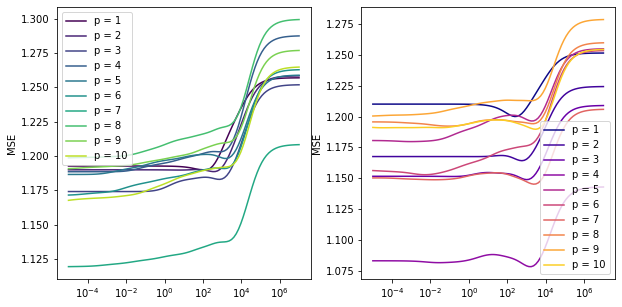

In [48]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.viridis(carr)
cs_test = plt.cm.plasma(carr)
fig, axs = plt.subplots(1,2, figsize=(10,5))
for ip in range(mses_train.shape[0]):
    axs[0].plot(lambdas, mses_train[ip], color = cs_train[ip], label="p = %i"%(ip+1))
    axs[1].plot(lambdas, mses_test[ip], color = cs_test[ip], label="p = %i"%(ip+1))
[ax.set_xscale('log') for ax in axs]
[ax.set_ylabel("MSE") for ax in axs]
[ax.set_xlabel("log10$\\lambda$")]
[ax.legend() for ax in axs]